In [ ]:
# To solve for  :Popular Product category in each state

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Diwali Sales Data.csv" , encoding = 'unicode_escape')
#  Avoiding encoding error with unicode_escape
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Droping Unnecesary columns

df.drop(['Status','unnamed1'], axis =1, inplace = True)

In [7]:
# Checking null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# droping null values'

df.dropna(inplace=True)

In [9]:
# Changing the dtype of Amount to int

df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtype

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
# Renaming a column'

df.rename(columns = {'Marital_Status' : 'Shaddi'})

# dictionary

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaddi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [13]:
# TO study mean , count , percentile of numeric columns we use describe function

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
#  Using describe for specific column
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Exploratory Data Analysis

Gender

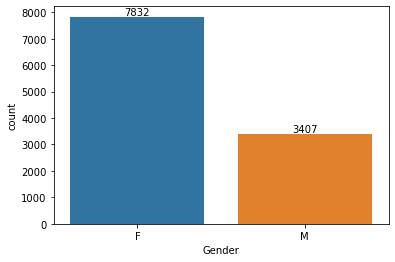

In [15]:
# Creating a count plot for Gender to know the specific number of Male nad female 

gen_count = sns.countplot(x = 'Gender' , data = df)
# writing the specific count value above the bar
for bars in gen_count.containers:
    gen_count.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

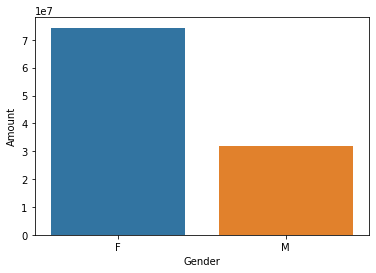

In [16]:
# Sorting in ascedning order the sum of amount spent by each gender 
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
# using bar plot to see the amount spent sum by beach gender
sns.barplot(x ='Gender', y = 'Amount' ,data=sales_gender)


### Analysis :   
                From the above graphs we can see, Female buyer are more than male and female's spending is also greater than male

##### Age

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

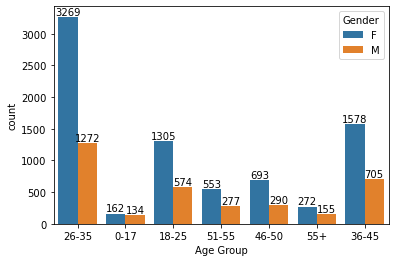

In [18]:
sale_age = sns.countplot(data = df, x= 'Age Group', hue = 'Gender')


for bars in sale_age.containers:
    sale_age.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

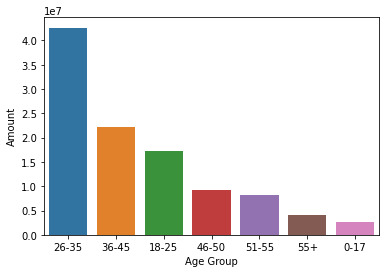

In [19]:
sales_age_group = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Age Group' , y = 'Amount' , data = sales_age_group)


### Analysis
               From the above 2 graph we can see that most of the buyer are female from age 26-35

#####  State

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='State', ylabel='Orders'>

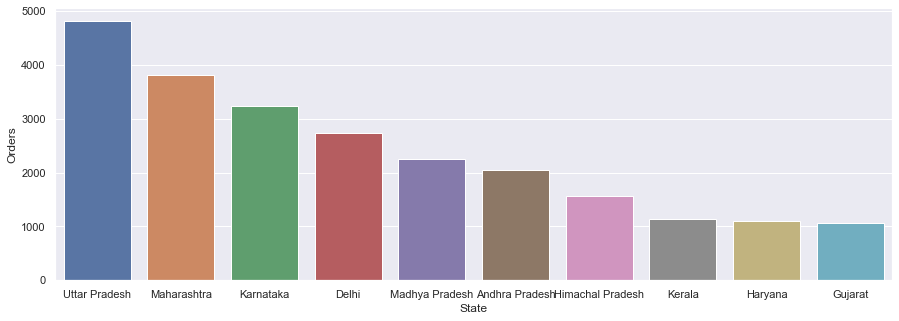

In [21]:

# To see the nimber of orders by state from the whole dta
sales_state = df.groupby(['State'] , as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)
# below line is setting the fig size through sns, to see the graph effectively
sns.set(rc = {'figure.figsize':(15,5)})

sns.barplot(x = 'State' , y = 'Orders' , data = sales_state)


From the above graph we can see that UP state has done most of the shopping duirng diwali

<AxesSubplot:xlabel='State', ylabel='Amount'>

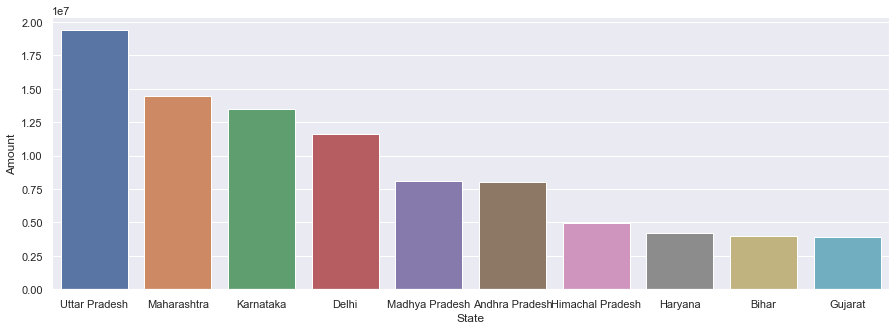

In [22]:
# Total amount/sales from top 10 state 


# To see the nimber of orders by state from the whole dta
salesP_state = df.groupby(['State'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)
# below line is setting the fig size through sns, to see the graph effectively
sns.set(rc = {'figure.figsize':(15,5)})

sns.barplot(x = 'State' , y = 'Amount' , data = salesP_state)


#### Marital Status

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

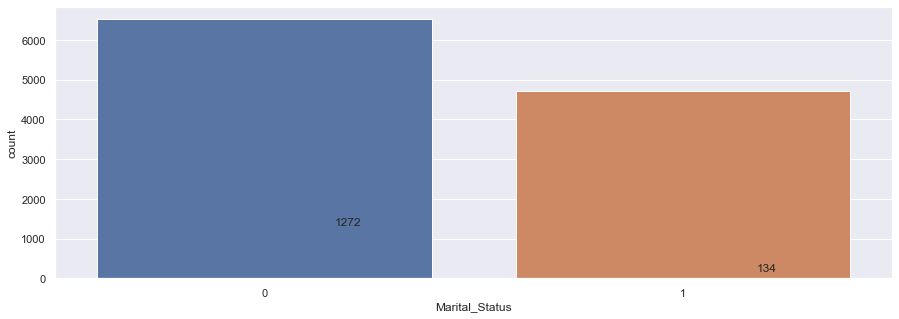

In [24]:
#  On the basis of marital status we are seeing the count of people that are shopping during diwale

marital_count = sns.countplot(data = df , x = 'Marital_Status')

for bar in marital_count.containers:
    marital_count.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

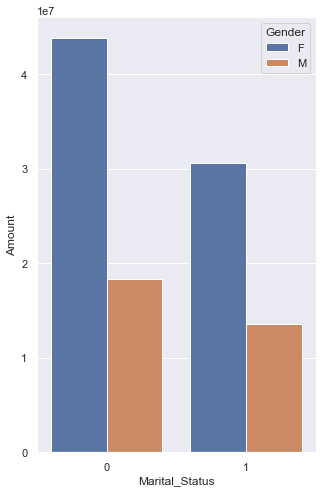

In [25]:

# To see the amount spent by married and non married on gender basis 
sales_marital = df.groupby(['Marital_Status' , 'Gender'], as_index = False ) ['Amount'].sum().sort_values(by = 'Amount' , ascending= False)
sns.set(rc = {'figure.figsize':(5,8)})

sns.barplot(data =sales_marital, x = 'Marital_Status' , y = 'Amount' ,  hue = 'Gender')

### Analysis
              The count and spending of unmarried female is higher than that of unmarreid male and married people
              

### Occupation

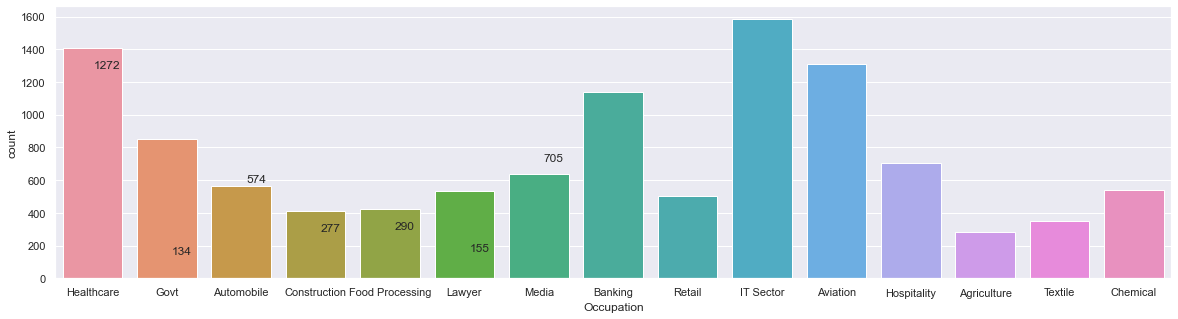

In [26]:
# Count on basis of Occupation
sns.set(rc = {'figure.figsize':(20,5)})
occ_count = sns.countplot(data = df , x = 'Occupation')


for bar in occ_count.containers:
    occ_count.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

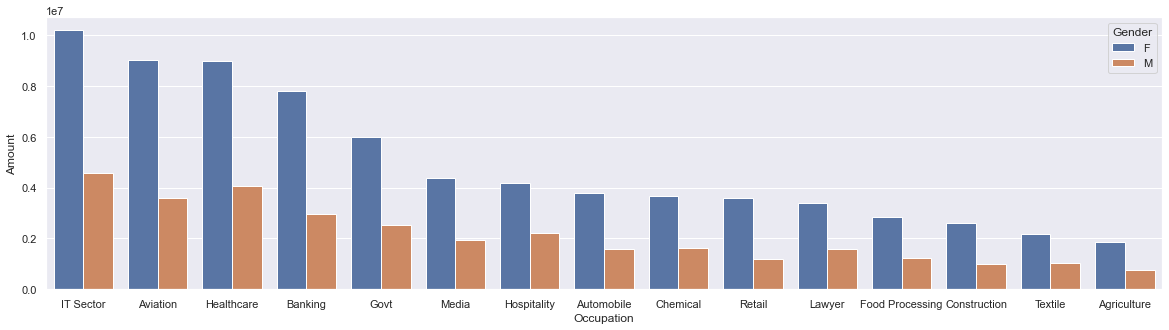

In [27]:

occ_amount = df.groupby(['Occupation' , 'Gender'], as_index = False ) ['Amount'].sum().sort_values(by = 'Amount' , ascending= False)
sns.set(rc = {'figure.figsize':(20,5)})

sns.barplot(data =occ_amount, x = 'Occupation' , y = 'Amount' ,  hue = 'Gender')

### Analysis
                IT sector, Aviation and Healthcare professionals are spending more during diwale

### Product based

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

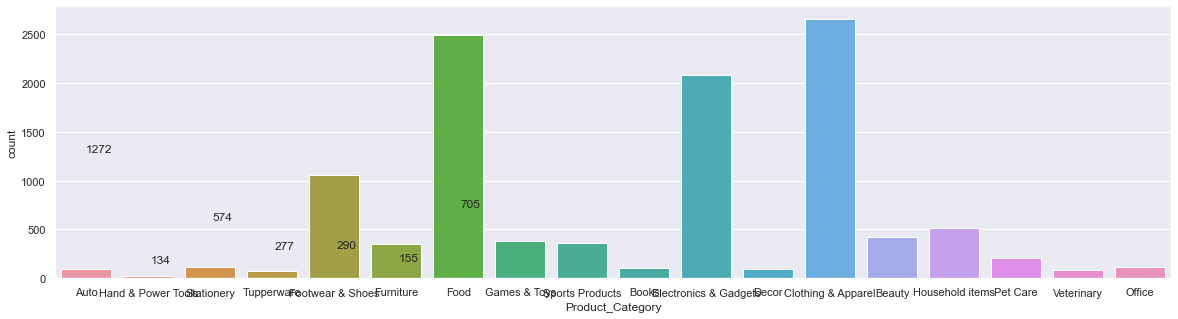

In [45]:
sns.set(rc = {'figure.figsize':(20,5)})
prod_sales = sns.countplot(data = df , x = 'Product_Category' )


for bar in prod_sales.containers:
    prod_sales.bar_label(bars)



# product_sale = df.groupby({'Product_Category'}).sum(), (sort(by = 'Amount'), ascending= False)

# sns.barplot(data = 'product_sale' ,x= 'Product_Category' , y  = 'Amount' )

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

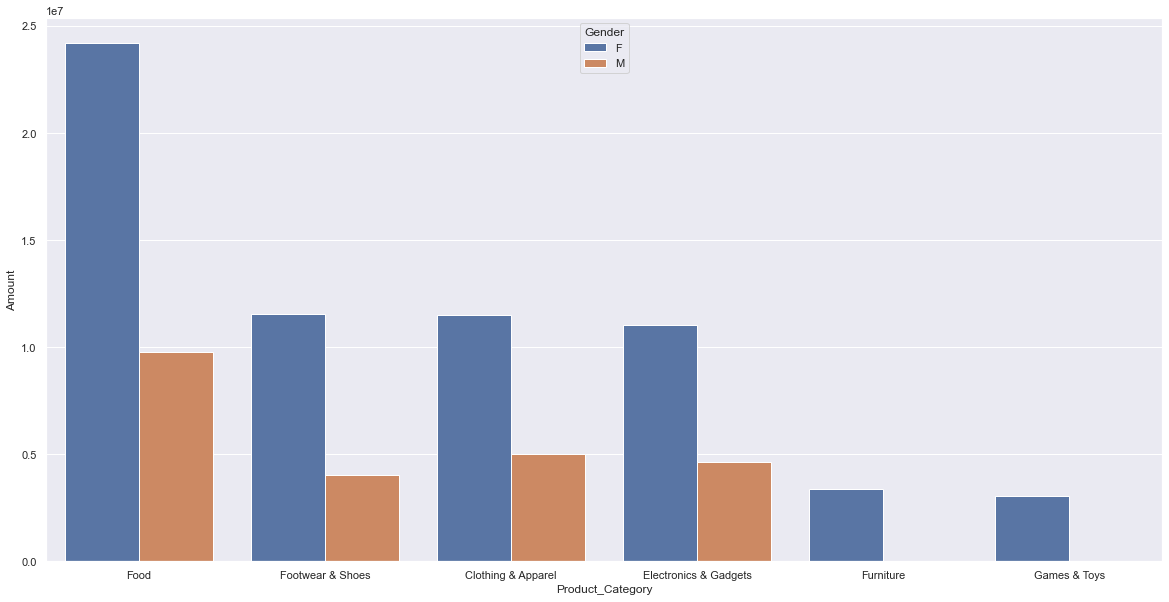

In [46]:

product_sale = df.groupby(['Product_Category' , 'Gender'], as_index = False ) ['Amount'].sum().sort_values(by = 'Amount' , ascending= False).head(10)
sns.set(rc = {'figure.figsize':(20,10)})

sns.barplot(data =product_sale, x = 'Product_Category' , y = 'Amount' ,  hue = 'Gender')

#### Analysis
            From the above two graphs and untill now, Unmarried female from UP, Mahrashtra, karnatakan and Delhi that are working in  IT sector, Aviation and Healthcare are spending more on Clothes and Passion, Food and Electronic and gadgets.

C:\Users\FARAZM~1\AppData\Local\Temp/ipykernel_11636/4130436098.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_id = df.groupby(['Product_ID'], as_index=False)['Orders' , 'Amount'].sum().sort_values(by = 'Orders' , ascending= False ).head(10)


<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

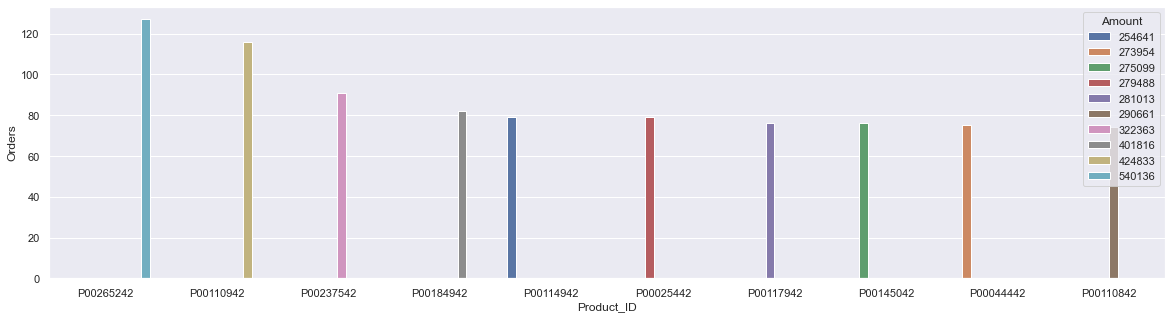

In [56]:
sales_id = df.groupby(['Product_ID'], as_index=False)['Orders' , 'Amount'].sum().sort_values(by = 'Orders' , ascending= False ).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})


sns.barplot(data = sales_id , x = 'Product_ID' , y = 'Orders' , hue = 'Amount')

Conclusion: 

   Married women with age group 26_35 year from UP, Mahrashtra, karnatka working in IT, healthcare and Aviation are more likely buying products from Food , clothing and electronic gadgets.